1. 

En este ejercicio vas a trabajar con un clasificador binario. Para ello utilizarás el dataset usuarios_win_mac_lin.csv. Elimina del dataframe todas las filas que se correspondan con la clase valor "1". Encontrarás datos de navegación de usuarios dentro de una web (paginas, duración...) y tendrás que predecir desde qué sistema operativo viene el usuario.

Realiza el ejercicio con el nuevo dataframe (eliminando los 1s):

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load Data

In [8]:
df_orig = pd.read_csv("data/usuarios_win_mac_lin.csv")
print(df_orig.shape)
df_orig.head()

(170, 5)


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [35]:
# Eliminamos la clase 1 para convertirlo en un problema binario

df = df_orig.copy()
df = df[df.clase != 1]

df["clase"] = df["clase"].map({0:0, 2:1})
df.shape

(130, 5)

# Análisis de Datos

<AxesSubplot: >

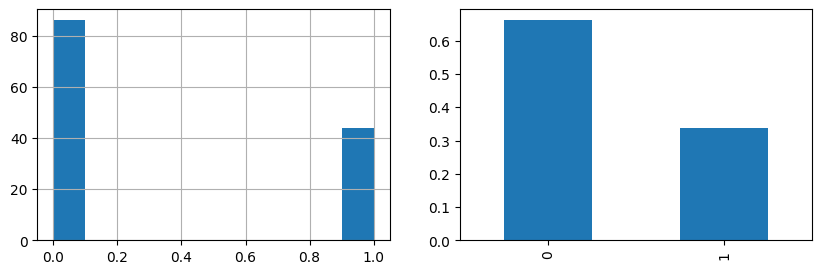

In [36]:
# Vamos a comprobar si nuesttro dataset está balanceado

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
df["clase"].hist(ax=ax[0])
df["clase"].value_counts(normalize=True).plot(kind="bar", ax=ax[1])

<AxesSubplot: >

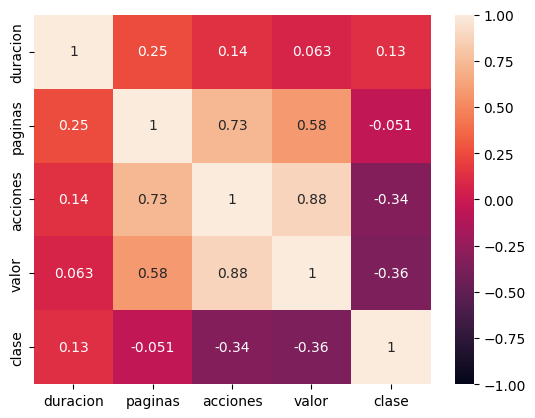

In [37]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

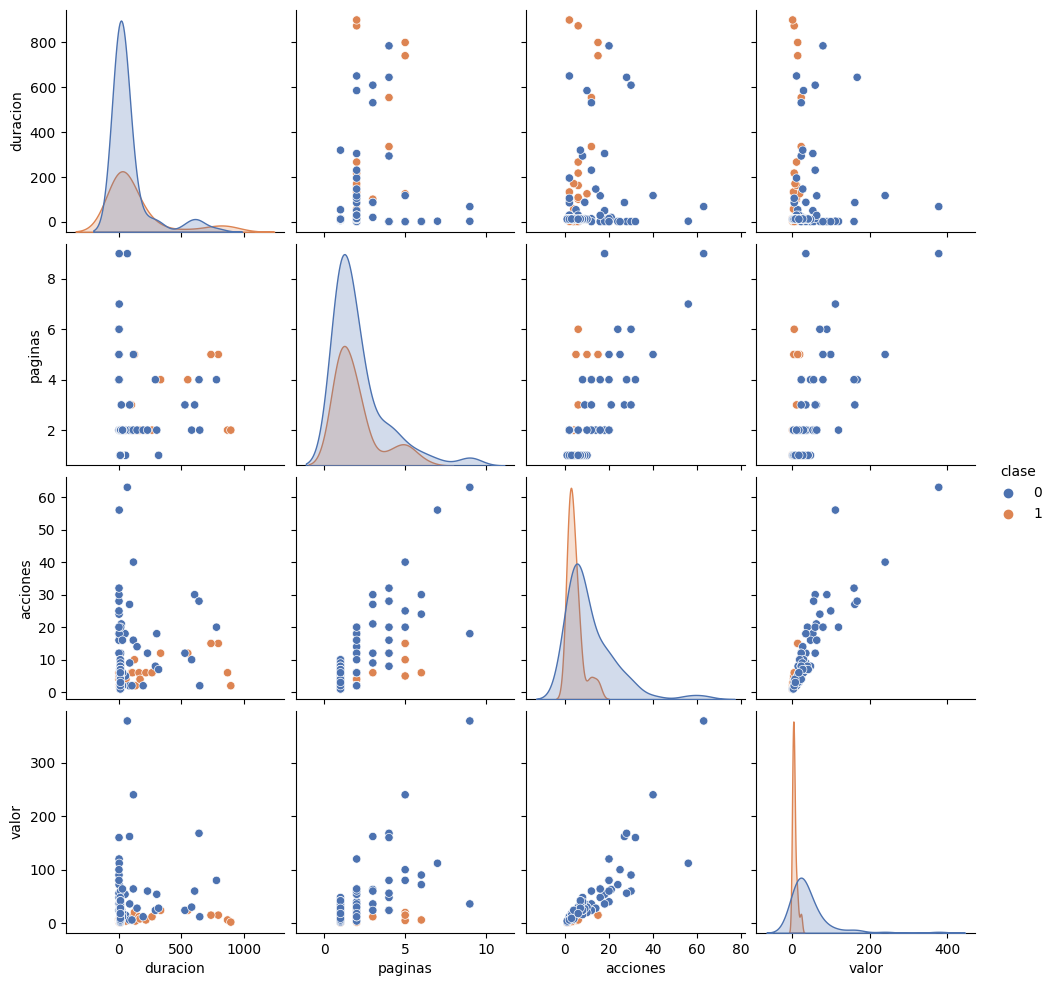

In [38]:
sns.pairplot(df, hue="clase",palette="deep")

# Train Test Split

In [39]:
X = df.drop(columns="clase").copy()
y = df["clase"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

print(X_train.shape, X_test.shape)

(91, 4) (39, 4)


<AxesSubplot: >

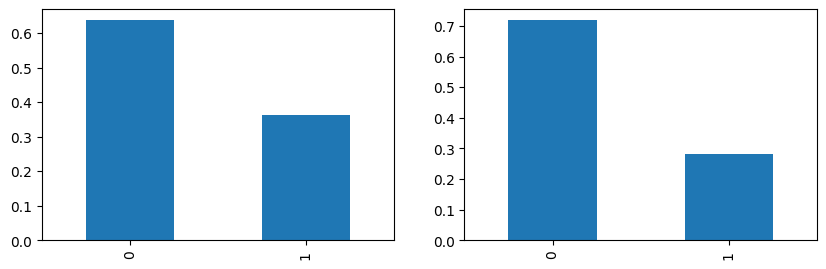

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
y_train.value_counts(normalize=True).plot(kind="bar", ax=ax[0])
y_test.value_counts(normalize=True).plot(kind="bar", ax=ax[1])

# Creación de Modelo

## Hyperparam Tuning

In [58]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("logistic", LogisticRegression(max_iter=100000, random_state=0))])

grid_log = {"logistic__C": np.logspace(-2, 2, 100),
            "logistic__penalty": ["l1", "l2"],
            "logistic__solver": ["liblinear"]}

cv_model = GridSearchCV(pipe, 
                        grid_log, 
                        scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
                        cv=3,
                        refit=False)

cv_model.fit(X_train, y_train)

c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alber\AppData\Local

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=100000,
                                                           random_state=0))]),
             param_grid={'logistic__C': array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02...
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear']},
             refit=False,
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [61]:
df_res = pd.DataFrame(cv_model.cv_results_)
df_res.sort_values(by="rank_test_roc_auc").iloc[0]

print(df_res.sort_values(by=["rank_test_roc_auc"]).iloc[0])
d_params = df_res.sort_values(by=["rank_test_roc_auc"]).iloc[0]["params"]
d_params

mean_fit_time                                                       0.007378
std_fit_time                                                        0.001463
mean_score_time                                                     0.004525
std_score_time                                                      0.000682
param_logistic__C                                                  43.287613
param_logistic__penalty                                                   l1
param_logistic__solver                                             liblinear
params                     {'logistic__C': 43.287612810830616, 'logistic_...
split0_test_accuracy                                                0.935484
split1_test_accuracy                                                0.866667
split2_test_accuracy                                                0.933333
mean_test_accuracy                                                  0.911828
std_test_accuracy                                                   0.031946

{'logistic__C': 43.287612810830616,
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [75]:
import re
d_params={re.findall(".*__(.*)", k)[0]:v for k,v in d_params.items()}
d_params

IndexError: list index out of range

In [82]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("logistic", LogisticRegression(max_iter=100000, random_state=0))])

grid_log = {"logistic__C": np.linspace(15, 25, 100),
            "logistic__penalty": ["l1"],
            "logistic__solver": ["liblinear"]}

cv_model = GridSearchCV(pipe, 
                        grid_log, 
                        scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
                        cv=3,
                        refit=False)

cv_model.fit(X_train, y_train)

df_res = pd.DataFrame(cv_model.cv_results_)
df_res.sort_values(by="rank_test_roc_auc").iloc[0]

print(df_res.sort_values(by=["rank_test_roc_auc"]).iloc[0])
d_params = df_res.sort_values(by=["rank_test_roc_auc"]).iloc[0]["params"]
d_params={re.findall(".*__(.*)", k)[0]:v for k,v in d_params.items()}
d_params

mean_fit_time                                                       0.004647
std_fit_time                                                          0.0009
mean_score_time                                                     0.004861
std_score_time                                                      0.000588
param_logistic__C                                                       25.0
param_logistic__penalty                                                   l1
param_logistic__solver                                             liblinear
params                     {'logistic__C': 25.0, 'logistic__penalty': 'l1...
split0_test_accuracy                                                0.935484
split1_test_accuracy                                                0.866667
split2_test_accuracy                                                0.933333
mean_test_accuracy                                                  0.911828
std_test_accuracy                                                   0.031946

{'C': 25.0, 'penalty': 'l1', 'solver': 'liblinear'}

<AxesSubplot: xlabel='param_logistic__C'>

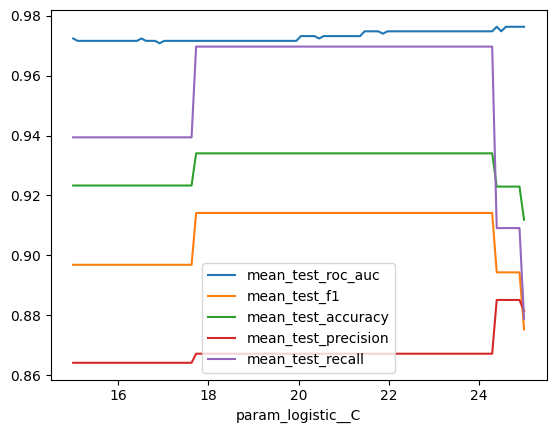

In [68]:
df_res.set_index("param_logistic__C")[["mean_test_roc_auc", "mean_test_f1", "mean_test_accuracy", "mean_test_precision", "mean_test_recall"]].plot()

In [ ]:
df_

In [90]:
pipe_def = Pipeline([("scaler", StandardScaler()),
                    ("logistic", LogisticRegression(max_iter=100000, random_state=0, **d_params))])

pipe_def.fit(X_train, y_train)

y_hat = pipe_def.predict(X_test)
y_prob = pipe_def.predict_proba(X_test)[:, 1]

f1_test = metrics.f1_score(y_test, y_hat)
print(f"F1-SCORE: {f1_test:.4f}")

prec_test = metrics.precision_score(y_test, y_hat)
print(f"PRECISION: {prec_test:.4f}")

rec_test = metrics.recall_score(y_test, y_hat)
print(f"RECALL: {rec_test:.4f}")

acc_test = metrics.accuracy_score(y_test, y_hat)
print(f"ACCURACY: {acc_test:.4f}")

ROC_AUC_test = metrics.roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {ROC_AUC_test:.4f}")

F1-SCORE: 0.8800
PRECISION: 0.7857
RECALL: 1.0000
ACCURACY: 0.9231
ROC AUC: 0.9675


In [94]:
print(pipe_def["logistic"].classes_)

[0 1]


<AxesSubplot: >

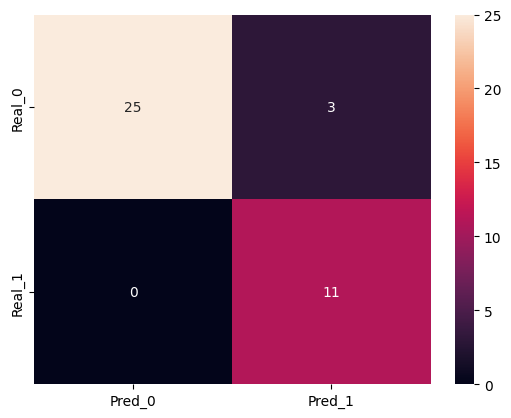

In [99]:
cm = metrics.confusion_matrix(y_test, y_hat)

df_cm = pd.DataFrame(cm, columns=[f"Pred_{i}" for i in pipe_def["logistic"].classes_],
                     index=[f"Real_{i}" for i in pipe_def["logistic"].classes_])
sns.heatmap(df_cm, annot=True)

In [85]:
metrics.f1_score(y_test, y_hat)

0.88

# CV Results on the Whole Dataset

In [105]:
cv_out = cross_validate(pipe_def, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

In [108]:
df_res_tot = pd.DataFrame(cv_out)
df_res_tot.mean()

fit_time          0.013255
score_time        0.009159
test_accuracy     0.915385
test_precision    0.825734
test_recall       0.977778
test_f1           0.889649
test_roc_auc      0.973693
dtype: float64

In [109]:
model = pipe_def.fit(X, y)

model

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=25.0, max_iter=100000, penalty='l1',
                                    random_state=0, solver='liblinear'))])

<BarContainer object of 4 artists>

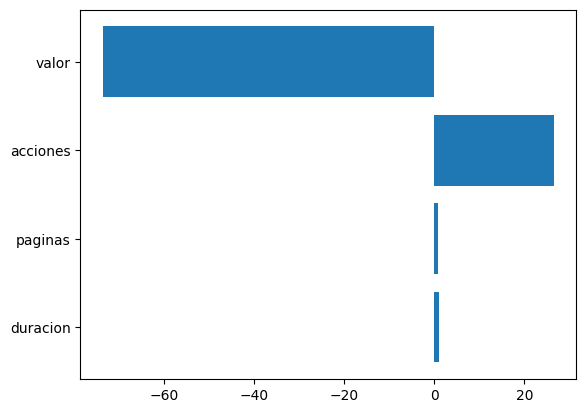

In [113]:
plt.barh(width=model["logistic"].coef_.reshape(-1), y=X.columns)